# Description of the Notebook
In this notebook we developed and tested the split function.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
import os

# Add the directory containing the module to the system path
module_path = os.path.abspath(os.path.join('C:\\Users\\samue\\OneDrive\\AIML\\HS2024\\Data Sicence Projekt\\HSLU_DSPRO1_TrafficStatus\\data'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Import the module
import data_engineering_library.py as dlib

In [4]:
# Load the data form seperate dictionary, because the data is too big to load onto github
# Dataload restricted to 1 million rows, because of speed and memory issues
# Just for testing purposes
dataframe_london_UTD19 = dlib.load_data(path=r"C:\Users\samue\OneDrive\AIML\HS2024\Data Sicence Projekt\Data\London_UTD19.csv", nrows=1000000)
dataframe_london_UTD19.head()

#Conzept Train/Test split
def split_data(df):
    test_set = pd.DataFrame()
    train_set = pd.DataFrame()

    # Group by day and sensor, Data should be sorted by day and detid, this is to make shure nothing is mixed up
    grouped = df.groupby(['day', 'detid'])

    for (day, sensor), group in grouped:
        # Randomly select 8 intervals
        intervals = np.random.choice(range(288), 8, replace=False) * 300
        test_indices = group.index[group['interval'].isin(intervals)]
        
        # Split into test and train sets
        test_set = pd.concat([test_set, group.loc[test_indices]])
        train_set = pd.concat([train_set, group.drop(test_indices)])

    return train_set, test_set

In [6]:
train_set, test_set = dlib.split_data_sniper(dataframe_london_UTD19)
df_test = pd.DataFrame(test_set)
df_train = pd.DataFrame(train_set)
print(test_set.size/train_set.size)

0.02858435934623178


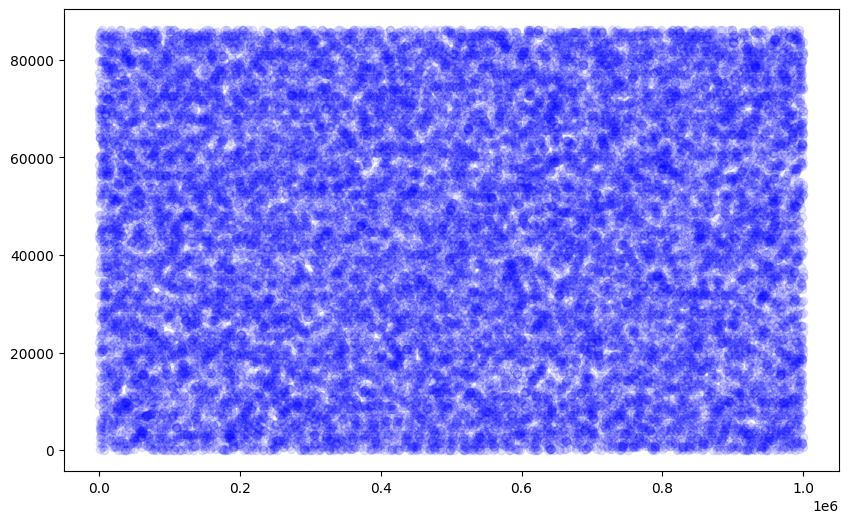

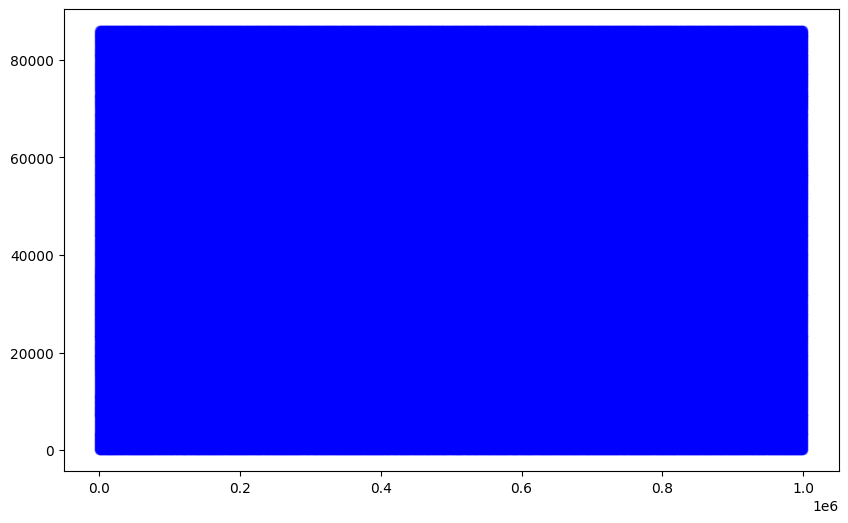

In [7]:
# Plot to check if the data is split correctly. Has no patterns
plt.figure(figsize=(10, 6))
plt.scatter(df_test.index, df_test['interval'], alpha=0.1, color='blue')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_train.index, df_train['interval'], alpha=0.1, color='blue')
plt.show()

In [8]:
train_set, test_set = dlib.split_data_day(dataframe_london_UTD19)
df_test = pd.DataFrame(test_set)
df_train = pd.DataFrame(train_set)
print(test_set.size/train_set.size)

0.04711493657101272


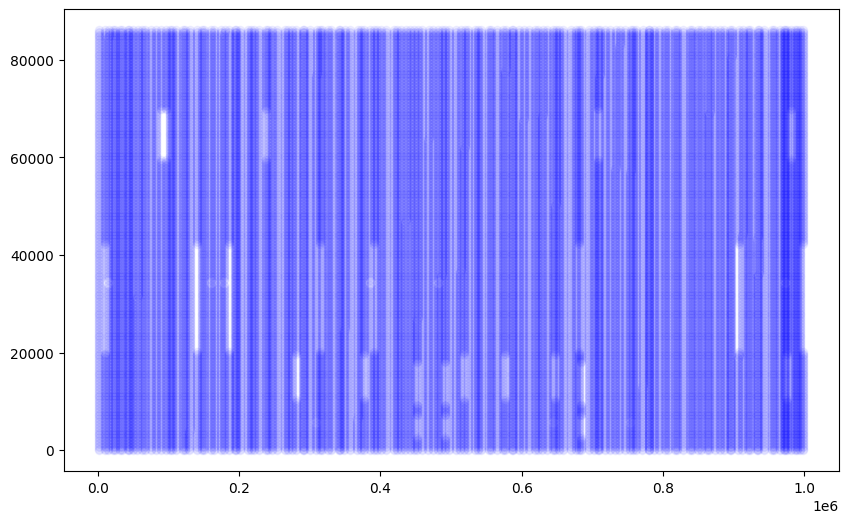

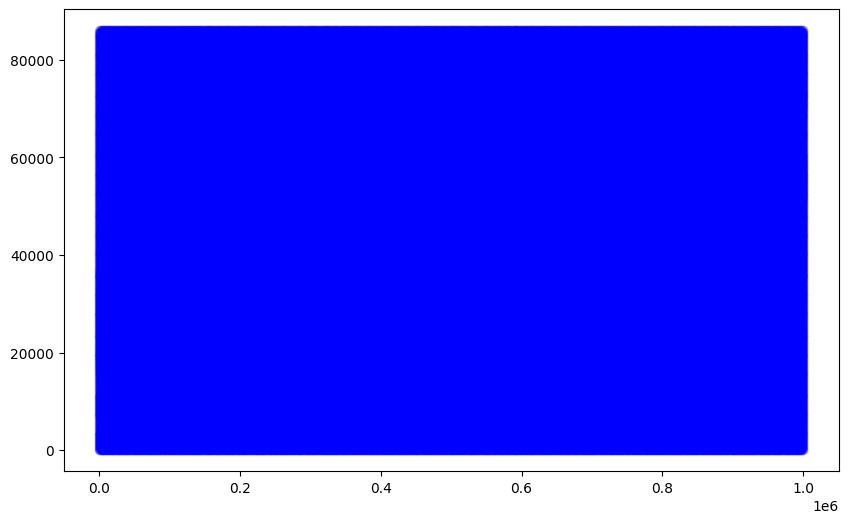

In [9]:
# Plot to check if the data is split correctly. Has no patterns
plt.figure(figsize=(10, 6))
plt.scatter(df_test.index, df_test['interval'], alpha=0.05, color='blue')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_train.index, df_train['interval'], alpha=0.05, color='blue')
plt.show()

In [10]:
train_set, test_set = dlib.split_data_week(dataframe_london_UTD19)
df_test = pd.DataFrame(test_set)
df_train = pd.DataFrame(train_set)
print(test_set.size/train_set.size)

0.34705170792686046


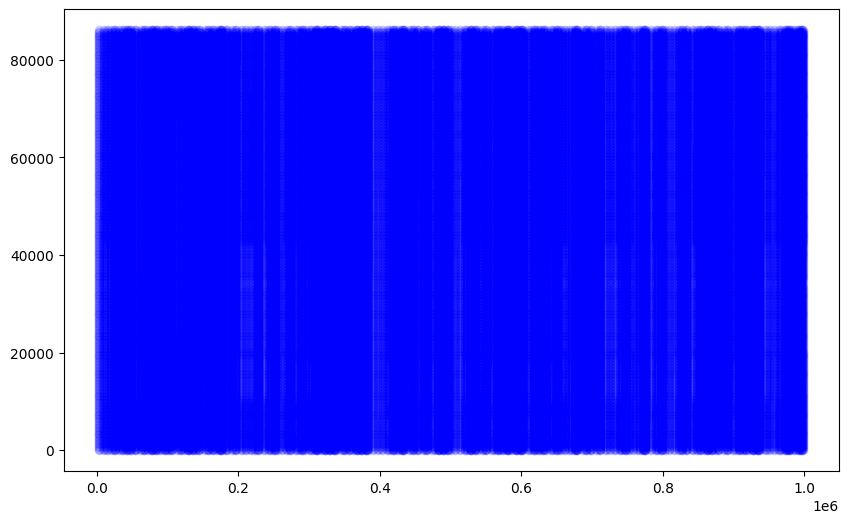

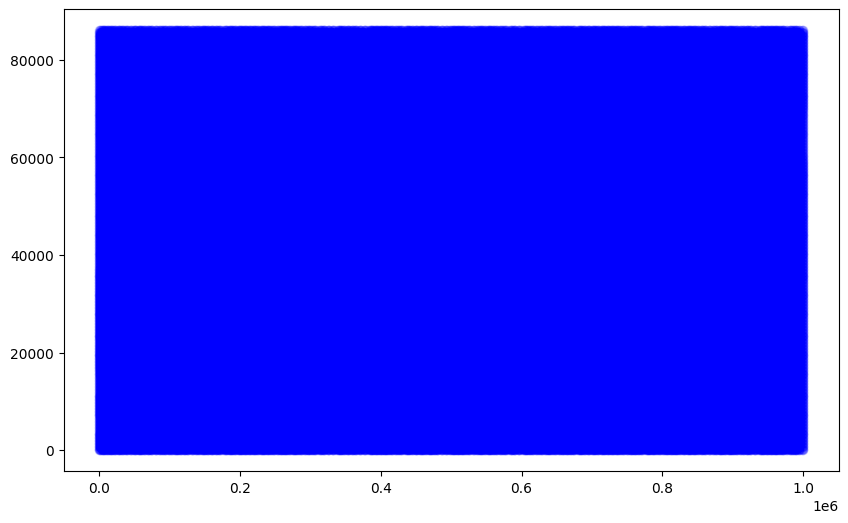

In [11]:
# Plot to check if the data is split correctly. Has no patterns
plt.figure(figsize=(10, 6))
plt.scatter(df_test.index, df_test['interval'], alpha=0.05, color='blue')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_train.index, df_train['interval'], alpha=0.05, color='blue')
plt.show()